In [ ]:
from google.colab import files
file = files.upload() 

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_excel("/content/Telco_customer_churn.xlsx")
df.head()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, roc_curve
from sklearn.metrics import *

from sklearn.impute import KNNImputer
from sklearn.neighbors import KNeighborsClassifier

from sklearn.linear_model import LogisticRegression

from sklearn.ensemble import RandomForestClassifier

from xgboost import XGBClassifier

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
df = pd.DataFrame(df)
df.columns

<Axes: >

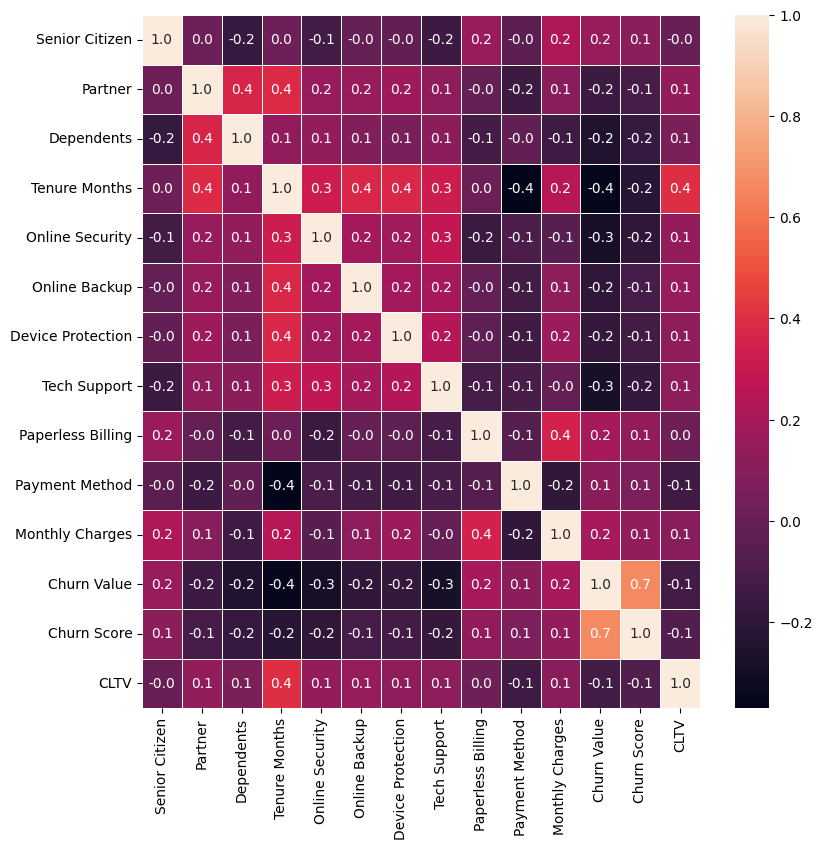

In [ ]:

#correlation map
f,ax = plt.subplots(figsize=(9,9))
sns.heatmap(df.corr(), annot=True, linewidths=.5, fmt= '.1f', ax=ax)

In [ ]:
df.info()

In [ ]:
url = (
    "https://raw.githubusercontent.com/python-visualization/folium/master/examples/data"
)
state_geo = f"{url}/us-states.json"

In [ ]:
# df['Total Charges'] = df['Total Charges'].replace(" ", 0).astype('float32')


In [ ]:

cat_var = [key for key in dict(df.dtypes)
             if dict(df.dtypes)[key] in ['object'] ] # Categorical Varible
cat_var

In [ ]:

# loop through the categorical columns and display unique values
for col in ['CustomerID', 'Count', 'Country', 'State', 'City', 'Zip Code',
       'Lat Long', 'Latitude', 'Longitude', 'Gender', 'Senior Citizen',
       'Partner', 'Dependents', 'Tenure Months', 'Phone Service',
       'Multiple Lines', 'Internet Service', 'Online Security',
       'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV',
       'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method',
       'Monthly Charges', 'Total Charges', 'Churn Label', 'Churn Value',
       'Churn Score', 'CLTV', 'Churn Reason']:
    print(col, ": ", df[col].unique())

In [ ]:
import pandas as pd


# drop the columns that are not required
df.drop(['CustomerID', 'Count', 'Country', 'State', 'City', 'Zip Code', 'Lat Long', 'Latitude', 'Longitude', 'Churn Reason', 'Gender','Total Charges' ], axis=1, inplace=True)


In [ ]:
df.columns

In [ ]:

#correlation map
f,ax = plt.subplots(figsize=(9,9))
sns.heatmap(df.corr(), annot=True, linewidths=.5, fmt= '.1f', ax=ax)

Dropping columns with 0 correlation with Churn Score (Target Variable).
Simultaneously dropping Churn Label since it is highly correlated with Churn Score and also dropping Contract alongside due to its high correlation with the Tenure Months column.

In [ ]:
import pandas as pd


# drop the columns that are not required
df.drop([ 'Phone Service', 'Internet Service','Streaming TV', 'Streaming Movies', 'Multiple Lines','Contract', 'Churn Label'], axis=1, inplace=True)

In [ ]:
cat_var2 = [key for key in dict(df.dtypes)
             if dict(df.dtypes)[key] in ['object'] ] # Categorical VaribleS after dropping
cat_var2



In [ ]:

# loop through the categorical columns and display unique values
for col in ['Senior Citizen', 'Partner', 'Dependents', 'Online Security', 'Online Backup', 'Device Protection', 
            'Tech Support',   'Paperless Billing', 'Payment Method']:
    print(col, ": ", df[col].unique())

1. yes/no = use label encoding (or np.where) to convert to binary (1/0)
2. for categorical columns with less than 6 categories, use 1 hot encoding
3. for ordinal/ranked (hirachial) data (eg. small, medium, large), use ordinal encoding

In [ ]:
import pandas as pd
import numpy as np


# create a list of categorical columns to encode
cat_cols = ['Senior Citizen', 'Partner', 'Dependents', 
            'Paperless Billing']

# loop through each categorical column and encode the values
for col in cat_cols:
    df[col] = np.where(df[col]=='Yes', 1, 0)


In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder


# create a LabelEncoder object
le = LabelEncoder()

# loop through the categorical columns and encode them
for col in [ 
             'Online Security', 'Online Backup', 'Device Protection', 
            'Tech Support',  
             'Payment Method']:
    df[col] = le.fit_transform(df[col])

# display the encoded dataframe
print(df.head())


In [ ]:
# import pandas as pd

# # Create pivot table with multiple columns
# # p_table = pd.pivot_table(df, index = ['CustomerID','State','City', 'Lat Long','Gender','Multiple Lines','Streaming Movies','Contract','Payment Method','Total Charges','Churn Reason'],columns=['Partner', 'Senior Citizen', 'Dependents','Phone Service','Online Security','Online Backup','Device Protection','Tech Support','Streaming TV','Streaming Movies','Paperless Billing', 'Churn Label'])

# p_table = pd.pivot_table(df, index = ['CustomerID','State','City', 'Lat Long','Gender','Multiple Lines','Streaming Movies','Contract','Payment Method','Total Charges','Churn Reason'])
# df = pd.DataFrame(p_table)
# df



In [ ]:
x = df.drop("Churn Value", axis=1)
y = df["Churn Value"]

# Splitting into test and train
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3,random_state = 0)

# Creating an instance of standard scaler
scaler = StandardScaler()

#Standardizing the predictors
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)




In [ ]:
x_train.shape

In [ ]:
x_test.shape

In [ ]:
def gridsearch(model , param):
    gscv = GridSearchCV(estimator = model, 
                         param_grid = param, 
                         scoring='accuracy',
                         cv = 5,
                         n_jobs = -1)
    gscv.fit(x_train , y_train)
    result = gscv.best_params_
    return result

In [ ]:
# Logistic Regression
gs_lr = LogisticRegression(random_state=0, solver='lbfgs')
lr_params = {"C": [10 ** x for x in range(-5, 5, 1)],
             "penalty": ['l2']}
print('Best parameters for Logistic Regression: ', gridsearch(gs_lr, lr_params))


In [ ]:
# Random Forest
gs_rf = RandomForestClassifier(random_state = 0)
rf_params = {
 'n_estimators':[100, 150, 200],
 'criterion': ('gini','entropy'),
 'max_depth': range(2,8)}
print('Best parameters for Random Forest: ', gridsearch(gs_rf , rf_params))

Best parameters for Random Forest:  {'criterion': 'entropy', 'max_depth': 7, 'n_estimators': 200}


In [ ]:
# KNN
gs_knn = KNeighborsClassifier()
knn_params ={'n_neighbors':[3,5,7,9,11]}
print('Best parameters for KNN: ', gridsearch(gs_knn , knn_params))

Best parameters for KNN:  {'n_neighbors': 11}


In [ ]:
# XGB
xgb_gs =  XGBClassifier(random_state = 0, verbosity = 0)
xgb_params =  {'n_estimators':[100,300],
              'learning_rate':[0.1,0.2]} 
print(f'Best parameters for XGBoost: ', gridsearch(xgb_gs , xgb_params))

Best parameters for XGBoost:  {'learning_rate': 0.1, 'n_estimators': 100}


Model Building

In [ ]:
lr  = LogisticRegression(random_state=0, C=0.01, penalty = 'l2')
knn = KNeighborsClassifier(n_neighbors= 5)
rf  = RandomForestClassifier(max_depth=7, random_state=0 , criterion= 'gini' , n_estimators= 150)
xgb = XGBClassifier(random_state= 0 , learning_rate= 0.1 , n_estimators= 100)

Model Metrics

In [ ]:
def creport(model):
    y_pred = model.predict(x_test)
    return classification_report(y_test, y_pred)

In [ ]:
logistic_regression = lr
logistic_regression.fit(x_train,y_train)
print(creport(logistic_regression))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95      1559
           1       0.88      0.82      0.84       554

    accuracy                           0.92      2113
   macro avg       0.91      0.89      0.90      2113
weighted avg       0.92      0.92      0.92      2113



In [ ]:
random_forest = rf
random_forest.fit(x_train,y_train)
print(creport(random_forest))

              precision    recall  f1-score   support

           0       0.94      0.97      0.95      1559
           1       0.91      0.83      0.86       554

    accuracy                           0.93      2113
   macro avg       0.92      0.90      0.91      2113
weighted avg       0.93      0.93      0.93      2113



In [ ]:
KNN = knn
KNN.fit(x_train,y_train)
print(creport(KNN))

              precision    recall  f1-score   support

           0       0.91      0.94      0.92      1559
           1       0.81      0.72      0.76       554

    accuracy                           0.88      2113
   macro avg       0.86      0.83      0.84      2113
weighted avg       0.88      0.88      0.88      2113



In [ ]:
XGB = xgb
XGB.fit(x_train , y_train)
print(creport(XGB))

              precision    recall  f1-score   support

           0       0.95      0.96      0.95      1559
           1       0.87      0.84      0.86       554

    accuracy                           0.93      2113
   macro avg       0.91      0.90      0.90      2113
weighted avg       0.93      0.93      0.93      2113



Evaluation of Models

In [ ]:
y_train_pred_rf = random_forest.predict(x_train)
y_train_pred_knn = KNN.predict(x_train)
y_train_pred_lr = logistic_regression.predict(x_train)
y_train_pred_xgb = XGB.predict(x_train)

y_test_pred_rf = random_forest.predict(x_test)
y_test_pred_knn = KNN.predict(x_test)
y_test_pred_lr = logistic_regression.predict(x_test)
y_test_pred_xgb = XGB.predict(x_test)

In [ ]:
def accuracy(y_test , ypred):
    return accuracy_score(y_test , ypred)

def f1(y_test , ypred):
    return f1_score(y_test, ypred, average='macro')

DNN

In [ ]:
input_shape = x_train.shape[1]

dnn = Sequential()
dnn.add(Dense(16, activation='relu', input_shape = (input_shape,), name = "Hidden_Layer_1"))
dnn.add(Dense(8, activation='relu', name = "Hidden_Layer_2"))
dnn.add(Dense(4, activation='relu', name = "Hidden_Layer_3"))
dnn.add(Dense(2, activation='relu', name = "Hidden_Layer_4"))
dnn.add(Dense(1, activation='sigmoid', name = "Output"))

dnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Hidden_Layer_1 (Dense)      (None, 16)                224       
                                                                 
 Hidden_Layer_2 (Dense)      (None, 8)                 136       
                                                                 
 Hidden_Layer_3 (Dense)      (None, 4)                 36        
                                                                 
 Hidden_Layer_4 (Dense)      (None, 2)                 10        
                                                                 
 Output (Dense)              (None, 1)                 3         
                                                                 
Total params: 409
Trainable params: 409
Non-trainable params: 0
_________________________________________________________________


In [ ]:
dnn.compile(optimizer ='adam',
              loss='binary_crossentropy', 
              metrics =['accuracy'])

In [ ]:
dnn.fit(x_train, y_train, epochs=100)

In [ ]:
y_test_pred_dnn = dnn.predict(x_test)
y_test_pred_dnn = (y_test_pred_dnn>0.5)

67/67 [==============================] - 0s 2ms/step


In [ ]:
train_score_dnn = dnn.evaluate(x_train, y_train, verbose = 0)[1]
test_score_dnn = dnn.evaluate(x_test, y_test, verbose = 0)[1]

print("Training Score: {:.3f}".format(train_score_dnn))
print("Test Score (Accuracy): {:.3f}".format(test_score_dnn))
print("Precision: {:.3f}".format(precision_score(y_test, y_test_pred_dnn)))
print("Recall: {:.3f}".format(recall_score(y_test, y_test_pred_dnn)))
print("F1 Score: {:.3f}".format(f1_score(y_test, y_test_pred_dnn)))

Training Score: 0.943
Test Score (Accuracy): 0.921
Precision: 0.851
Recall: 0.848
F1 Score: 0.850


In [ ]:
all_evaluate = pd.DataFrame({'Model':['Random Forest', 'KNN', 'Logistic Regression', 'XGBoost', 'DNN'],
    'Train Accuracy':[accuracy(y_train,y_train_pred_rf), accuracy(y_train,y_train_pred_knn), 
                      accuracy(y_train,y_train_pred_lr), accuracy(y_train,y_train_pred_xgb),
                      train_score_dnn],
    'Test Accuracy':[accuracy(y_test,y_test_pred_rf), accuracy(y_test,y_test_pred_knn), 
                     accuracy(y_test,y_test_pred_lr), accuracy(y_test,y_test_pred_xgb),
                     test_score_dnn],                                   
    'f1-score':[f1(y_test,y_test_pred_rf), f1(y_test,y_test_pred_knn), 
                f1(y_test,y_test_pred_lr), f1(y_test,y_test_pred_xgb),
                f1_score(y_test, y_test_pred_dnn)]}
                     )

pd.DataFrame(all_evaluate)

,Model,Train Accuracy,Test Accuracy,f1-score
0,Random Forest,0.940365,0.932324,0.909907
1,KNN,0.918864,0.883105,0.843396
2,Logistic Regression,0.916633,0.921439,0.896131
3,XGBoost,0.969980,0.926645,0.904243
4,DNN,0.942596,0.921439,0.849910


**Performance Evaluation**

Confusin Matrix:

In [ ]:
def confusion_matrix_plot(model):
    ypred = model.predict(x_test)
    cm = confusion_matrix(y_test, ypred)
    cm = np.rot90(cm , 2)
    conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:1','Predicted:0'], index = ['Actual:1','Actual:0'])
    sns.heatmap(conf_matrix, annot = True, fmt = 'd', cbar = False, 
                linewidths = 0.1, annot_kws = {'size':20})
    plt.title('Confusion Matrix', fontsize = 15)

AUC-ROC Curve

In [ ]:
def roc_auc_plot(model):
    y_pred_prob = model.predict_proba(x_test)[:,1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    plt.plot(fpr, tpr)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.plot([0, 1], [0, 1],'r--')
    plt.title('ROC curve', fontsize = 15)
    plt.text(x = 0.02, y = 0.9, s = ('AUC Score:',round(roc_auc_score(y_test, y_pred_prob),4)))
    plt.grid(True)

Random Forest:

<ipython-input-45-ddfd0bb745d1>:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 1, 1)
<ipython-input-45-ddfd0bb745d1>:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 1, 2)


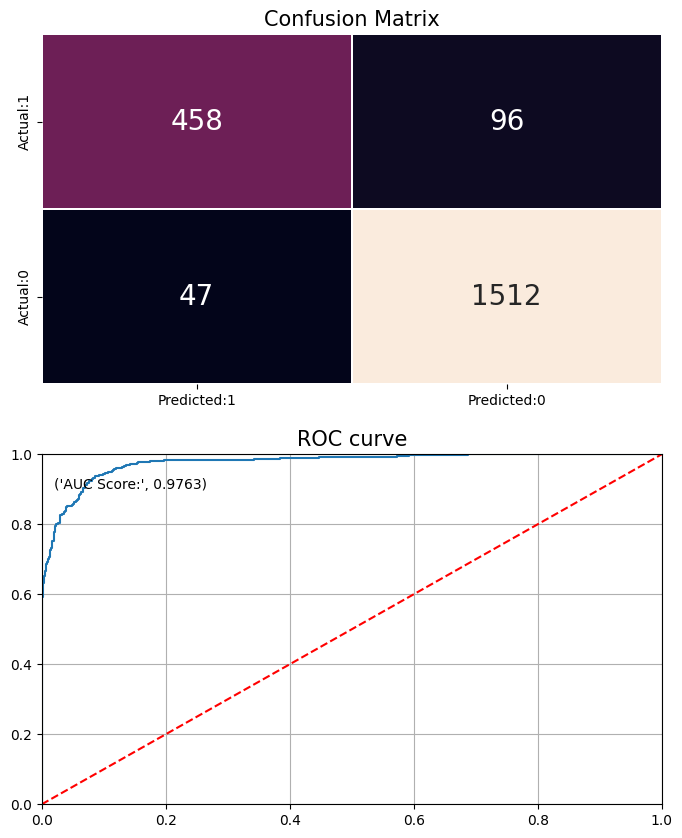

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(8, 10))
plt.subplot(2, 1, 1)
confusion_matrix_plot(rf)

plt.subplot(2, 1, 2)
roc_auc_plot(rf)

KNN:

<ipython-input-46-e8b522418274>:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 1, 1)
<ipython-input-46-e8b522418274>:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 1, 2)


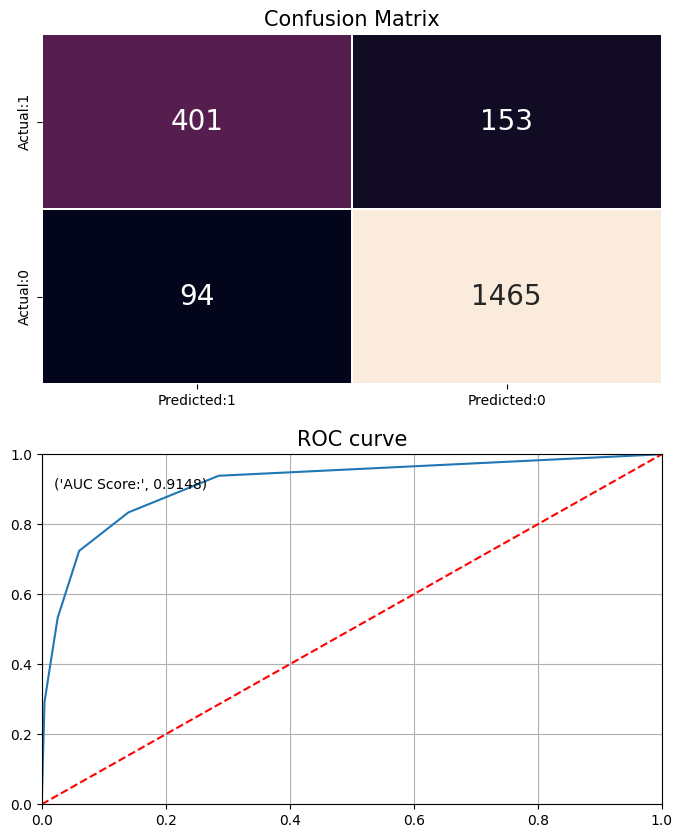

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(8, 10))
plt.subplot(2, 1, 1)
confusion_matrix_plot(knn)

plt.subplot(2, 1, 2)
roc_auc_plot(knn)

Logistic Regression:

<ipython-input-47-0b8fa561e5e7>:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 1, 1)
<ipython-input-47-0b8fa561e5e7>:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 1, 2)


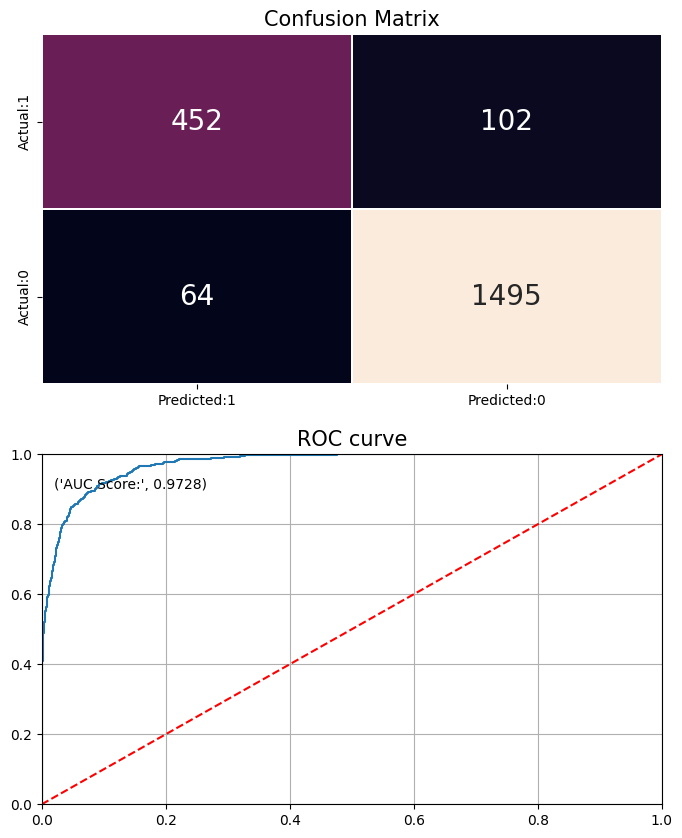

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(8, 10))
plt.subplot(2, 1, 1)
confusion_matrix_plot(lr)

plt.subplot(2, 1, 2)
roc_auc_plot(lr)

plt.show()

XGBoost:

<ipython-input-48-447e2325d1de>:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 1, 1)
<ipython-input-48-447e2325d1de>:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 1, 2)


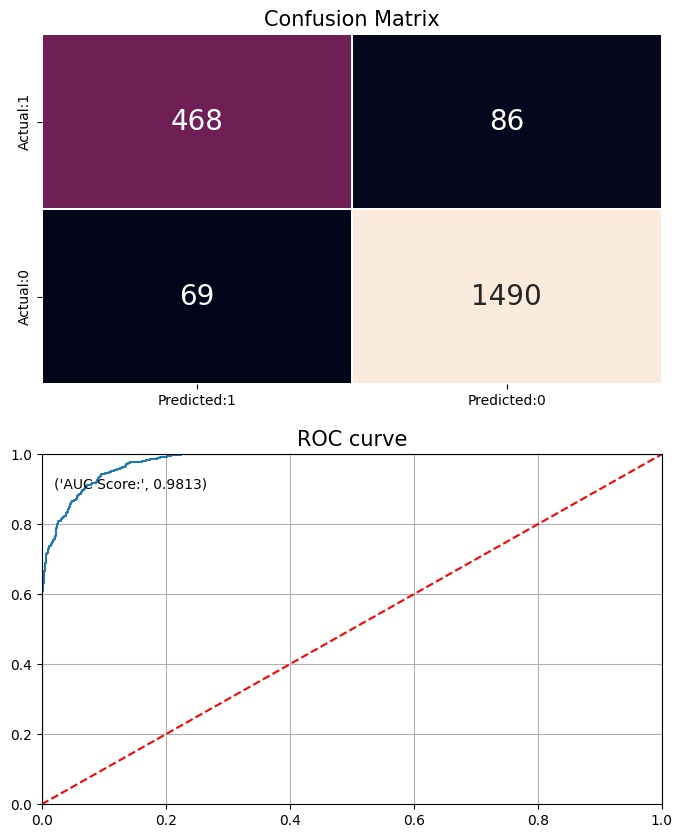

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(8, 10))
plt.subplot(2, 1, 1)
confusion_matrix_plot(xgb)

plt.subplot(2, 1, 2)
roc_auc_plot(xgb)

plt.show()


DNN:
---



<ipython-input-49-e3aebc540516>:7: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 1, 1)
<ipython-input-49-e3aebc540516>:18: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 1, 2)


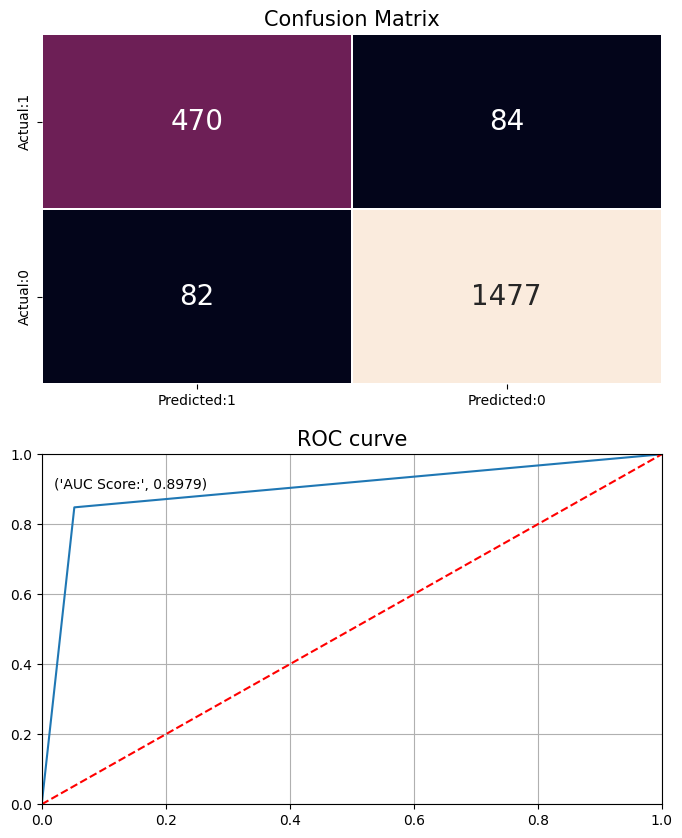

In [ ]:
# Compute Confusion Matrix
cm = confusion_matrix(y_test, y_test_pred_dnn)
cm = np.rot90(cm , 2)
conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:1','Predicted:0'], index = ['Actual:1','Actual:0'])

fig, axs = plt.subplots(2, 2, figsize=(8, 10))
plt.subplot(2, 1, 1)
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cbar = False, 
            linewidths = 0.1, annot_kws = {'size':20})
plt.title('Confusion Matrix', fontsize = 15)



# Compute TPR and FPR for various threshold values for ROC-AUC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_test_pred_dnn)
roc_auc = roc_curve(y_test, y_test_pred_dnn)

plt.subplot(2, 1, 2)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.plot([0, 1], [0, 1],'r--')
plt.title('ROC curve', fontsize = 15)
plt.text(x = 0.02, y = 0.9, s = ('AUC Score:',round(roc_auc_score(y_test, y_test_pred_dnn),4)))
plt.grid(True)

plt.show()